# Import statements

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph Class

In [8]:
class Graph:
    '''This is a class only used to define the undirected Graphs. These Graphs are then used to create the kNTs.'''
    def __init__(self, adjacency_list):
        self.adjacency_list = {str(key): [str(v) for v in value] for key, value in adjacency_list.items()}

    def two_direction_adj_list(self):
        '''Ensure that the graph is undirected.'''
        # Create a new dictionary to store the modified adjacency list
        modified_adjacency_list = {}

        # Iterate through the keys and values of the initial adjacency list
        for node, neighbors in self.adjacency_list.items():
            modified_adjacency_list[node] = neighbors
            # Add reverse edges for each edge
            for neighbor in neighbors:
                if neighbor not in modified_adjacency_list:
                    modified_adjacency_list[neighbor] = []
                if node not in modified_adjacency_list[neighbor]:  # Ensure no duplicate edges
                    modified_adjacency_list[neighbor].append(node)
        
        return modified_adjacency_list

    def get_neighbors(self, v):
        '''Return neighbors of a given node.'''
        outgoing_neighbors = self.adjacency_list.get(v, [])
        incoming_neighbors = [node for node, neighbors in self.adjacency_list.items() if v in neighbors]
        return list(set(outgoing_neighbors + incoming_neighbors))  # Combine and remove duplicates

    def find_longest_path(self):
        return 999999999
        # '''Use depth-first search to find the longest path in a graph.'''
        # def dfs(node, visited, path):
        #     visited.add(node)
        #     path.append(node)
        #     longest = path[:]
        #     for neighbor in self.get_neighbors(node):
        #         if neighbor not in visited:
        #             current_path = dfs(neighbor, visited, path)
        #             if len(current_path) > len(longest):
        #                 longest = current_path
        #     path.pop()
        #     visited.remove(node)
        #     return longest

        # longest_path = []
        # for start_node in self.adjacency_list:
        #     visited = set()
        #     path = []
        #     current_path = dfs(start_node, visited, path)
        #     if len(current_path) > len(longest_path):
        #         longest_path = current_path

        # return longest_path

# k-Redundant Neighborhood Tree Class and Build Function

In [9]:
class kNT:
    def __init__(self, G, root, k, h=None):
        self.root = str(root)
        self.k = k
        # The default maximum height is the number of nodes + 1
        if h is None:
            h = len(G.adjacency_list) + 2
        self.max_depth = h
        self.vertices = {self.root: []}
        self.edges = []
        self.nodes = {self.root}
        self.node_labels = {self.root: {'name': self.root.split('_')[0]}}
        self.unfolding_tree = nx.DiGraph()
        self.build_tree(G, self.root, k, h)

    def build_tree(self, G, w, k, h):
        # Create a dictionary to hold the depths of the nodes
        # We need this so we can check the depth condition
        D = {}
        D[w] = 0
        # Create a queue because we are imitating a BFS algorithm
        queue = [w]

        for i in range(1, h + 1):
            # Create an empty list that we will go through on the next height
            next_queue = []
            # For each node in our queue we do the following
            for v in queue:
                # Get the node name from the unique identifier
                original_node = v.split('_')[0]
                # Get all the neighbors of that node
                for u in G.get_neighbors(original_node):
                    # Make sure string
                    u = str(u)
                    # Record the depth that the neighbor is
                    depth_u = i
                    # Check if the depth of the neighbor violates the condition
                    # If it does, continue to the next neighbor without adding to the tree
                    if u in D and depth_u > D[u] + k:
                        continue
                    # If the condition is not violated, add the neighbor to the tree
                    D[u] = min(D.get(u, depth_u), depth_u)
                    unique_child = f"{u}_{i}_{original_node}_{v}"
                    self.add_vertex(unique_child)
                    self.add_edge(v, unique_child)
                    # And add the neighbor to the new queue we will check at the next depth
                    next_queue.append(unique_child)
            queue = next_queue

    def get_root(self):
        '''Return root of the tree.'''
        return self.root

    def add_vertex(self, vertex):
        '''Helper function to add vertex in tree creation.'''
        self.vertices[vertex] = []
        self.nodes.add(vertex)
        self.node_labels[vertex] = {'name': vertex.split('_')[0]}
        self.unfolding_tree.add_node(vertex, label=self.node_labels[vertex]['name'])


    def add_edge(self, parent, child):
        '''Helper function to add edge in tree creation.'''
        self.vertices[parent].append(child)
        self.edges.append((parent, child))
        self.nodes.add(child)
        self.node_labels[child] = {'name': child.split('_')[0]}
        self.unfolding_tree.add_edge(parent, child)

    def print_tree(self):
        '''Print the tree as text.'''
        print("Tree Structure:")
        for parent, children in self.vertices.items():
            print(f"Parent: {self.node_labels[parent]['name']}")
            if children:
                child_names = [self.node_labels[child]['name'] for child in children]
                print(f"Children: {child_names}")
            else:
                print("No Children")
            print("-" * 20)
    
    def plot_tree(self):
        '''Plot the tree on its own plot.'''
        fig, ax = plt.subplots(figsize=(6, 4))
        pos = nx.drawing.nx_agraph.graphviz_layout(self.unfolding_tree, prog='dot')  # Tree layout
        node_labels = {node: self.node_labels[node]['name'] for node in self.unfolding_tree.nodes()}        
        nx.draw(self.unfolding_tree, pos, ax=ax, labels=node_labels, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
        ax.set_title(f'{self.k}-Redundant Tree from Root {self.root}')
        plt.show()

    def plot_tree_with_ax(self, ax):
        '''Plot the tree on a given axis (for printing multiple subplots in one plot).'''
        pos = nx.drawing.nx_agraph.graphviz_layout(self.unfolding_tree, prog='dot')  # Tree layout
        node_labels = {node: self.node_labels[node]['name'] for node in self.unfolding_tree.nodes()}        
        nx.draw(self.unfolding_tree, pos, ax=ax, labels=node_labels, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
        ax.set_title(f'{self.k}-Redundant Tree from Root {self.root}')

    # def hgt(self):
    #     '''Return height of tree.'''
    #     def get_depth(node):
    #         if not self.chi(node):
    #             return 0
    #         else:
    #             return 1 + max(get_depth(child) for child in self.chi(node))
        
    #     return get_depth(self.root)

    # def depth(self, node):
    #     '''Return depth of a given node.'''
    #     return len(node.split('_')) - 1

    def chi(self, node):
        '''Return all children of a given node.'''
        return self.vertices[node]

    # def p(self, node):
    #     '''Return the parent of a given node.'''
    #     parts = node.split('_')
    #     if len(parts) > 2:
    #         return '_'.join(parts[2:])
    #     return None

# Checking for accuracy on given example

Example from https://arxiv.org/pdf/2312.04123

<img src="knt_example.png" width="700px">

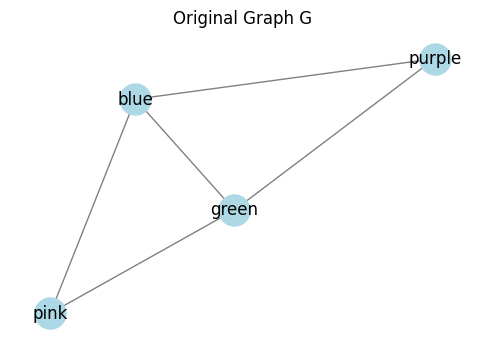

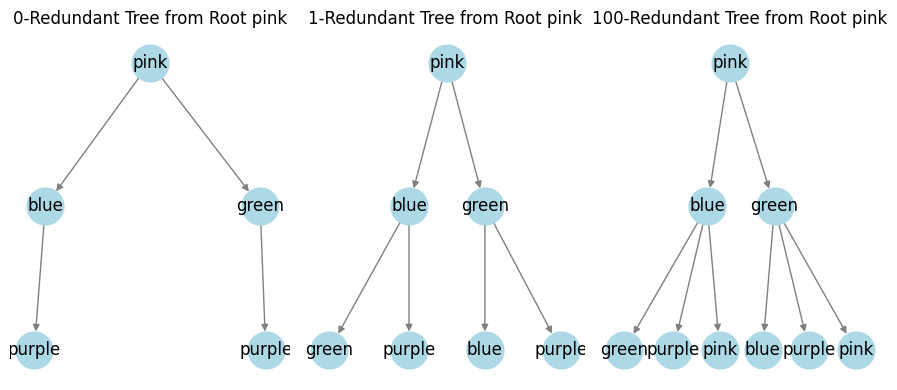

In [10]:
# Adjacency list from Figure 3
adjacency_list = {
    'pink': ['green', 'blue'],
    'green': ['blue', 'purple'],
    'blue': ['purple'],
    'purple': []
}

G = Graph(adjacency_list)
G.adjacency_list = G.two_direction_adj_list()
w = 'pink'

fig, ax = plt.subplots(figsize=(6, 4))
G_nx = nx.Graph(G.adjacency_list)
nx.draw(G_nx, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=ax)
plt.title("Original Graph G")
plt.show()

# Example height was 2 and root was 'pink'
h = 2
w = 'pink'
h = 2
fig, ax = plt.subplots(1, 3, figsize=(9, 4))
ks = [0, 1, 100]
for i in range(len(ks)):
    k = ks[i]
    tree = kNT(G, w, k, h)
    tree.plot_tree_with_ax(ax[i])
plt.tight_layout()
plt.show()

# Testing on other types of graphs

## Repeated node labels

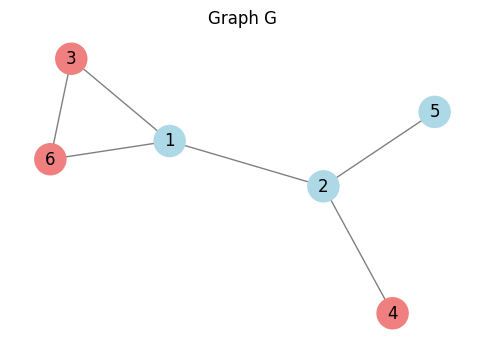

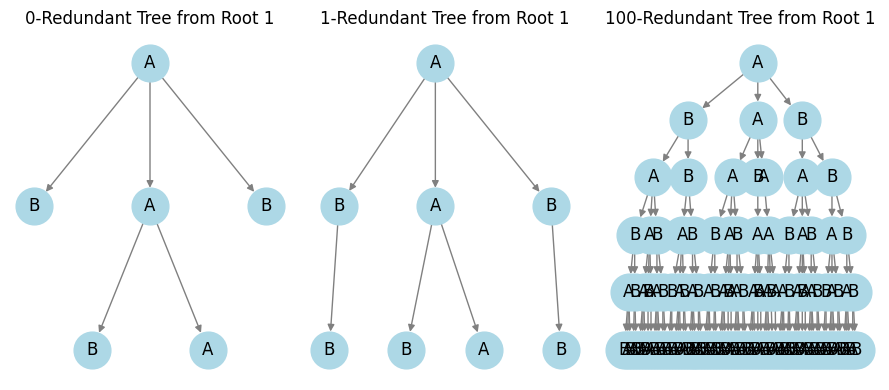

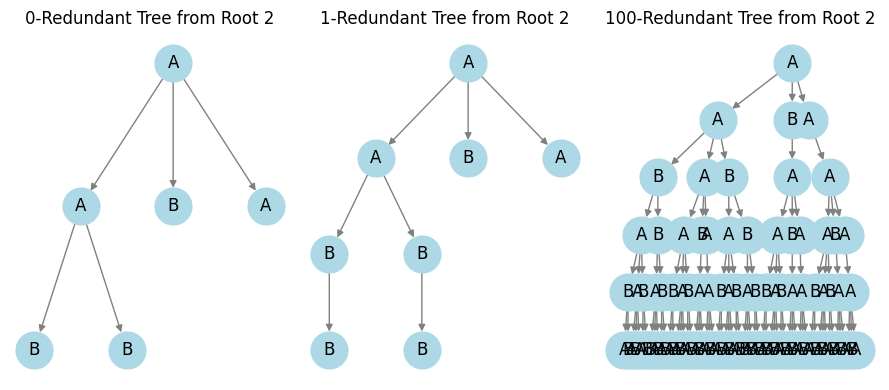

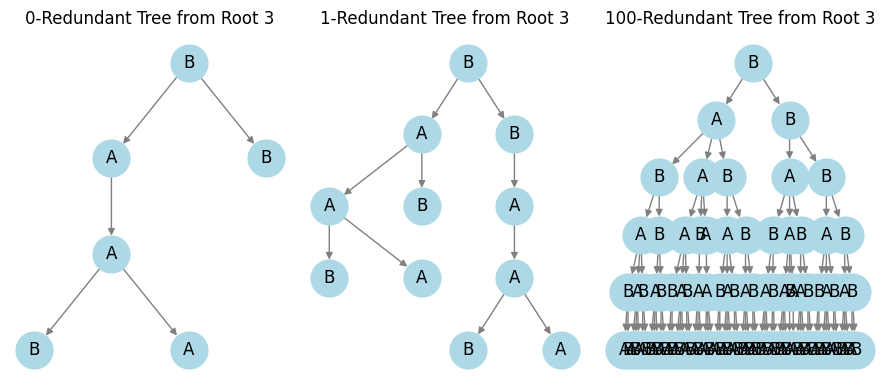

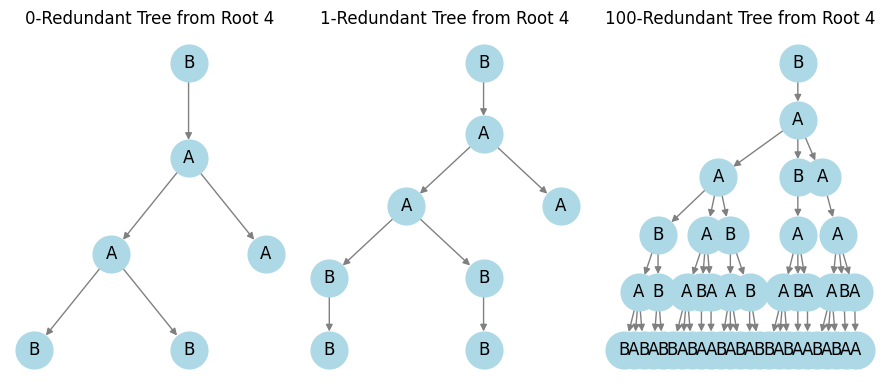

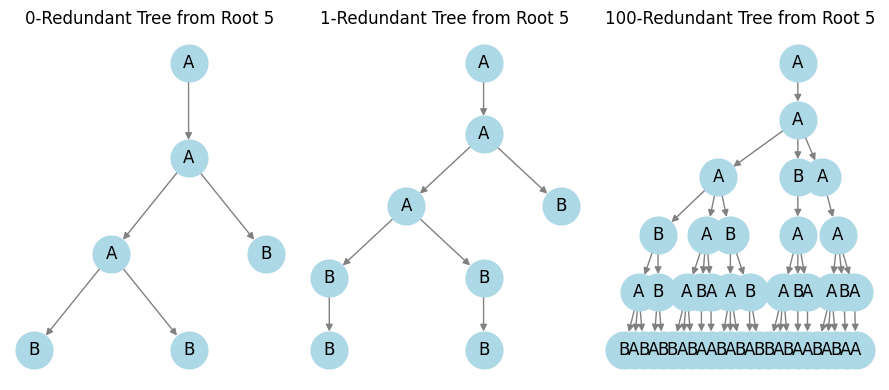

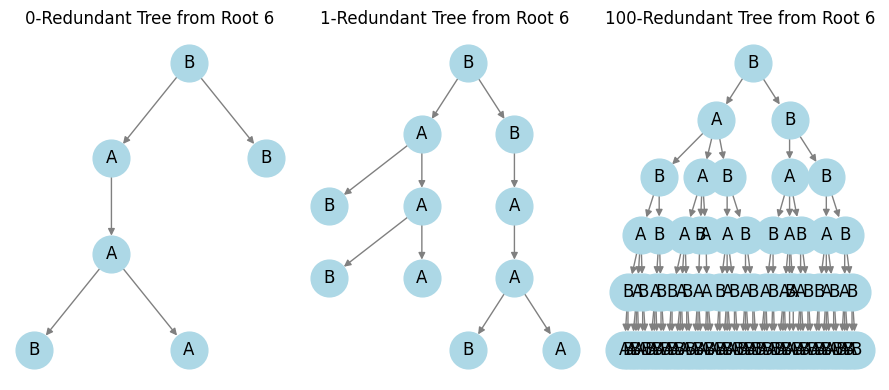

In [11]:
# Random adjacency list
adjacency_list = {
    '1': ['2', '3', '6'],
    '2': ['1', '4', '5'],
    '3': ['1', '6'],
    '4': ['2'],
    '5': ['2'],
    '6': ['3']
}

# Repeated node labels: A or B
node_labels = {
    '1': 'A',
    '2': 'A',
    '3': 'B',
    '4': 'B',
    '5': 'A',
    '6': 'B'
}

possible_roots = ['1', '2', '3', '4', '5', '6']

G = Graph(adjacency_list)
G.adjacency_list = G.two_direction_adj_list()

# Give different colors to the different labels so we visually check the TPTs
# Because I don't know how to make the shown label have both the node label and unique identifier
node_colors = ['lightblue' if node_labels[node] == 'A' else 'lightcoral' for node in G.adjacency_list]

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
G_nx = nx.Graph(G.adjacency_list)
nx.draw(G_nx, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()

for i in range(len(possible_roots)):
    w = possible_roots[i]
    fig, ax = plt.subplots(1, 3, figsize=(9, 4))
    ks = [0, 1, 100]
    for i in range(len(ks)):
        k = ks[i]
        max_height = 5
        tree = kNT(G, w, k, max_height)
        # The next two lines use the node labels
        # Without them you can make sure that the tree is constructed right based on unique identifiers
        # With them you can make sure that the node labels are being put on correctly for the tree
        for node in tree.nodes:
            tree.node_labels[node]['name'] = node_labels[node.split('_')[0]]
        tree.plot_tree_with_ax(ax[i])
    plt.tight_layout()
    plt.show()

## No Node Labels

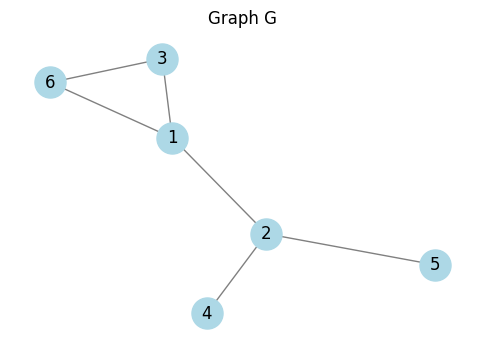

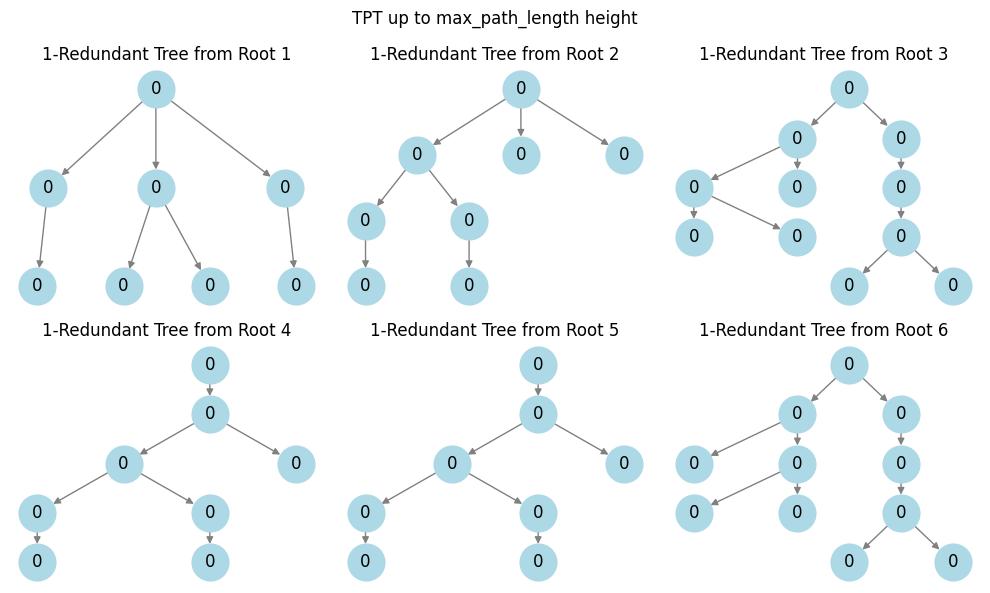

In [12]:
adjacency_list = {
    '1': ['2', '3', '6'],
    '2': ['1', '4', '5'],
    '3': ['1', '6'],
    '4': ['2'],
    '5': ['2'],
    '6': ['3']
}

possible_roots = ['1', '2', '3', '4', '5', '6']

G = Graph(adjacency_list)
G.adjacency_list = G.two_direction_adj_list()

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
G_nx = nx.Graph(G.adjacency_list)
nx.draw(G_nx, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()

# Plotting the kNTs
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle(f'TPT up to max_path_length height')

k = 1
for i in range(2):
    for j in range(3):
        w = possible_roots[i * 3 + j]
        knt = kNT(G, w, k)
        for node in knt.unfolding_tree.nodes():
            # Treat all nodes as having the same label '0'
            knt.node_labels[node] = {'name': '0'}
        knt.plot_tree_with_ax(axes[i, j])

plt.tight_layout()
plt.show()
